### <span style="color:blue">Collaborative Filtering Workshop II </span>

## 협업 필터링 (Collaborative Filtering) 구현하기 - Assignment

이번 수업에서는 추천 시스템(Recommender System)에서 널리 사용되는 협업 필터링(이하 Collaborative Filtering)의 원리를 알아보고 이를 구현해보겠습니다. 추천 시스템은 사용자(이하 사용자)가 특정 물건이나 서비스(이하 상품)에 대한 선호 여부나 선호도를 예측하는 시스템을 의미합니다. 추천 시스템은 아마존과 같은 이커머스부터 페이스북과 같은 SNS, 유튜브, 넷플릭스 등과 같은 동영상 플랫폼까지 다양한 분야에서 두루 활용되고 있습니다.

Collaborative Filtering에는 사용자에게 상품을 추천을 방법이 크게 두 가지가 있습니다. 1. 사용자가 선호하는 상품과 유사한 다른 상품 을 추천(상품 기반)하거나 2. 사용자와 유사한 다른 사용자가 선호하는 상품을 추천(사용자 기반)합니다. 사용자 기반 기법이 먼저 등장한 전통적인 알고리즘이고 상품 기반 방식은 이후 아마존(Amazon)이 제안한 기법입니다. 상품 기반 기법이 더 많은 기업들에서 사용되고 있다고 합니다.

사용자 기반 방식이 갖는 문제는 우선 **1. 계산 복잡성 문제**와 **2. 희소성 문제**가 대표적입니다. 아마존과 같이 거대 이커머스 회사들은 수백만 명의 사용자와 수백만 개의 상품을 관리해야하는데 사용자 기반 방식을 사용하는 경우 사용자가 추가될 때마다 나머지 모든 사용자와의 유사도를 연산해야한다는 문제점이 있습니다. 상품 기반 방식을 사용하는 경우에 미리 구해 놓은 상품 간 유사도를 활용할 수 있기 때문에 이러한 문제점이 어느 정도 해결됩니다! 물론 사용자 기반 방식도 상품과 사용자가 계속 추가되므로 일정 기간마다 새롭게 유사도를 구해야하지만 사용자 기반 방식보다는 훨씬 계산 복잡성이 작습니다. 그리고 계산 복잡성 문제가 해결되는 대신 이 거대한 행렬을 저장할 공간이 따로 확보되어야한다는 점을 굳이 단점으로 뽑을 수 있습니다. 데이터 희소성 문제는 협업 필터링 알고리즘의 본질적인 취약한 점이지만 사용자가 많은 상품을 평가한 경우는 보통 없어서 이런 경우 사용자간의 유사도를 연산하는 것 자체가 어렵기 때문에 보통 사용자 기반 방식이 더 취약합니다.


상품 / 사용자 기반 기법은 전반적으로 다음과 같은 흐름으로 동작합니다.

1. 우선 사용자 $u$가 내릴 상품 $i$에 대한 평점(rating)을 추정하고자 합니다. 상품 $i$ / 사용자 $u$와 나머지 모든 상품 / 사용자의 유사도를 연산합니다.
2. 유사도가 높은 k개 상품 / 사용자를 선택합니다. 이를 이웃이라고 부르겠습니다.
3. 상품 기반 혹은 사용자 기반 기법에 따라 아래 단계를 수행하며 평점을 예측합니다.
    - 상품 기반 : 이웃 상품에 내린 사용자 $u$의 평점(rating)을 상품 $i$와의 유사도에 따라 가중 평균을 구합니다. 
    - 사용자 기반 : 이웃 사용자가 상품 $i$에 내린 평점(rating)을 사용자 $u$와의 유사도에 따라 가중 평균을 구합니다.
4. 아직 평점(rating)이 없는 항목에 대해 모든 평점(rating)을 예측합니다. 평점(rating) 예측 값 상위 n개 상품을 추천합니다.

이러한 머신러닝 알고리즘을 잘 이해하는 방법은, 알고리즘을 파이썬과 같은 프로그래밍 언어로 직접 구현해보는 것입니다. 그러므로 이번 시간에는 주어진 데이터와 문제를 Collaborative Filtering을 활용하여 풀되, [surprise](http://surpriselib.com/)와 같은 추천 시스템 패키지를 사용하지 않고 파이썬으로 직접 구현해서 풀어보는 시간을 가질 것입니다.

**다만 상품 / 사용자 기반 기법은 상품과 사용자중 어떠한 것을 기준으로 삼을지만 다르고 구현하는 방식은 완전히 대칭적으로 동일**하기 때문에 사용자 기반 방식을 기준으로 구현하도록 하겠습니다. 기본적으로 사용자 기반 기법이 동작하는 흐름을 풀어쓰면 다음과 같습니다.

1. 우선 사용자 $u$가 내릴 상품 $i$에 대한 평점(rating)을 추정하고자 합니다. 사용자 $u$와 나머지 모든 사용자간의 유사도 구합니다.
2. 유사도를 기준으로 사용자 $u$와 가장 유사한(가까운) k명의 사용자(이웃)을 구합니다.
3. 이웃들이 상품 $i$에 내린 평점을 가까운 이웃일수록 더 큰 가중치를 주어서 평균을 구합니다. 즉, 가중평균을 구합니다.
4. 아직 평점(rating)이 없는 항목에 대해 위의 과정으로 모든 평점(rating)을 예측합니다.
5. 평점(rating) 예측 값 상위 n개 상품을 추천합니다.

## Configuration

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from itertools import product # product에 있는 intertools을 불러와서 사용함을 정의

## Generate Dataset

먼저 Collaborative Filtering 알고리즘 원리를 잘 이해할 수 있는 데이터셋을 생성해보겠습니다. 추천 시스템을 구현한다고 할 때 어떠한 정보를 활용해볼 수 있을까요?

예를 들어 이커머스 서비스 추천 시스템을 구현해본다고 가정했을 때, 크게 두 가지 정보를 활용해볼 수 있습니다. 

1. 우선 사용자가 상품을 구매한 이후 남긴 평점 정보를 활용할 수 있습니다.
2. 혹은 사용자가 상품 판매 페이지에 머무른 시간 혹은 해당 상품을 클릭했는지 등의 정보를 활용해볼 수도 있습니다. 

앞서 말한 경우와 같이 사용자가 상품에 내린 직접적인 평가 데이터를 명시적 정보 (이하 explicit ratings), 사용자 행동을 통해 추론한 상품에 대한 간접적인 평가 데이터를 암시적 정보 (이하 implicit ratings)라고 말합니다. 

explicit ratings는 사용자로부터 얻을 수 있는 가장 정확한 평점입니다. 하지만, 사용자가 평가를 내릴 때 충분한 시간을 할애하는 것은 아니기에 평점 간의 척도가 정확하지 않을 수 있고 평점 수가 충분하지 않다는 한계가 있습니다. 이에 비해 implicit ratings는 평점을 쉽게 많이 수집할 수 있다는 장점이 있지만, 해당 정보를 무조건 사용자가 상품에 내린 긍정적 평가라고 결론 내릴 수는 없다는 단점이 있습니다.

이번에 다룰 데이터셋은 1) 사용자(User)가 2) 책이라는 상품(Item)에 남긴 3) 1에서 5점 척도의 평점(rating) 데이터입니다. 사용자가 아직 보지 않은 책에 대한 3) 평점을 Collaborative Filtering으로 예측해보겠습니다. 먼저 이를 위한 예시 데이터셋을 생성한 뒤, 이 데이터를 바탕으로 모델을 구현해보겠습니다.

In [2]:
data = pd.read_csv('../data/ratings.csv')
data

,사람,책,평점
0,민지,백설공주,5.0
1,민지,신데렐라,4.0
2,민지,어린왕자,1.0
3,민지,흥부전,3.0
4,현우,노인과바다,3.0
5,현우,신데렐라,2.0
6,현우,콩쥐팥쥐,1.0
7,현우,흥부전,2.0
8,민수,노인과바다,3.0
9,민수,백설공주,4.0


협업필터링은 다음과 같은 형태의 데이터를 사용해야 합니다. 일반적으로 사용자는 `index`, 상품은 `columns`으로 지정합니다. 값으로는 평점, 구매횟수 등이 올 수 있습니다.

<table>
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>노인과바다</th>
      <th>백설공주</th>
      <th>신데렐라</th>
      <th>어린왕자</th>
      <th>콩쥐팥쥐</th>
      <th>흥부전</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>민지</th>
      <td>NaN</td>
      <td>5</td>
      <td>4</td>
      <td>1</td>
      <td>5</td>
      <td>3</td>
    </tr>
    <tr>
      <th>현우</th>
      <td>3</td>
      <td>NaN</td>
      <td>2</td>
      <td>3</td>
      <td>1</td>
      <td>2</td>
    </tr>
    <tr>
      <th>민수</th>
      <td>3</td>
      <td>4</td>
      <td>4</td>
      <td>3</td>
      <td>4</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>지민</th>
      <td>4</td>
      <td>1</td>
      <td>1</td>
      <td>5</td>
      <td>2</td>
      <td>3</td>
    </tr>
    <tr>
      <th>지연</th>
      <td>5</td>
      <td>NaN</td>
      <td>3</td>
      <td>4</td>
      <td>3</td>
      <td>3</td>
    </tr>
  </tbody>
</table>

In [5]:
# 판다스의 pivot_table을 이용하여 협업필터링에 사용할 데이터를 만듭니다.
ratings = data.pivot_table(index='사람', columns='책', values='평점')

# ratings를 확인합니다.
ratings

책,노인과바다,백설공주,신데렐라,어린왕자,콩쥐팥쥐,흥부전
사람,,,,,,
민수,3.0,4.0,4.0,3.0,4.0,NaN
민지,NaN,5.0,4.0,1.0,NaN,3.0
지민,4.0,1.0,NaN,5.0,2.0,3.0
지연,5.0,NaN,3.0,4.0,3.0,3.0
현우,3.0,NaN,2.0,NaN,1.0,2.0


## Notation

$r_{ui}$를 사용자 $u$가 상품 $i$에 내린 ratings, $I_{uv}$ 를 사용자 $u$와 사용자 $v$가 모두 평가한 상품 집합, $U_{ij}$를 상품 $i$와 상품 $j$를 모두 평가한 사용자 집합이라고 표기하겠습니다.

또한, 설명의 모든 예시는 사용자 "민지"의 상품 "노인과바다"에 대한 평점을 추청고자하며 자신을 제외한 모든 이웃들을 고려하겠습니다. 즉, k는 `총 사용자의 수 - 1`  가 됩니다.

## Calculate Similarity 

#### 사용자 기반(User-based)  기법

1. user "민지"와 나머지 모든 user의 유사도를 연산합니다. "민지"-"현우", "민지"-"민수", "민지"-"지민", "민지"-"지연"의 유사도를 연산합니다.

<table>
  <thead>
    <tr style="text-align: right;">
      <th>user</th>
      <th>유사도</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>현우</td>
      <td>0.7261</td>
    </tr>
    <tr>
      <th>민수</th>
      <td>0.9547</td>
    </tr>
    <tr>
      <td>지민</td>
      <td>0.5985</td>
    </tr>
    <tr>
      <th>지연</th>
      <td>0.8541</td>
    </tr>
  </tbody>
</table>

#### 상품 기반 (Item-based) 기법

1. item "노인과바다"와 나머지 모든 item의 유사도를 연사합니다. "노인과바다"-"백설공주", "노인과바다"-"신데렐라", "노인과바다"-"어린왕자", "노인과바다"-"콩쥐팥쥐", "노인과바다"-"흥부전"의 유사도를 연산합니다.

<table>
  <thead>
    <tr style="text-align: right;">
      <th>item</th>
      <th>유사도</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>백설공주</td>
      <td>0.7761</td>
    </tr>
    <tr>
      <td>신데렐라</td>
      <td>0.8794</td>
    </tr>
    <tr>
      <th>어린왕자</th>
      <td>0.9830</td>
    </tr>
    <tr>
      <td>콩쥐팥쥐</td>
      <td>0.9032</td>
    </tr>
    <tr>
      <th>흥부전</th>
      <td>0.9949</td>
    </tr>
  </tbody>
</table>


그렇다면 임의의 두 user 혹은 임의의 두 item, 즉 두 값이 얼마나 유사한지를 어떻게 판단할 수 있을까요? 우리가 알고 있는 가장 대표적인 방법으로 두 데이터가 얼마나 가까운지를 유클리디안 거리(Euclidean Distance)를 활용하여 측정해볼 수도 있습니다. 

이 외에도 다양한 유사도 메트릭을 사용하여 유사한 정도를 파악하는 것이 가능합니다. 주로 유사도 측정을 위하여 피어슨 상관계수(Pearson Correlation Coefficient), 스피어만 순위 상관계수(Sprearman Rank Correlation Coefficient), 켄달의 타우(Kendall's Tau), 코사인 유사도(Cosine Similarity), 자카드 유사도(Jaccard Coefficient) 등을 활용합니다.

이번 과제에서는 자주 쓰이는 코사인 유사도(Cosine Similarity)에 대하여 더 자세하게 알아보고 이를 직접 구현해보겠습니다. 

### Pearson Correlation Coefficient

피어슨 상관계수는 Collaborative Filtering에서 유사도 측정 메트릭으로 주로 사용되며, 두 벡터의 선형 상관관계를 확인하기 위해 사용됩니다. 식으로 표현하자면 아래와 같습니다.

$$
similarity(\textbf x,\textbf y)=r_{\textbf x\textbf y} = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i - \bar x)^2}\sqrt{\sum (y_i - \bar y)^2}}
$$

피어슨 상관계수는 +1과 -1 사이의 값을 갖습니다. +1에 가까울수록 강한 양의 선형 상관관계가 있다는 것을 의미하고 -1에 가까울수록 강한 음의 선형 상관관계가 있다는 것을 의미합니다. 또한 0은 아무런 선형 상관관계가 없음을 뜻합니다. 

상품 $i$와 상품 $j$의 피어슨 상관계수는 아래와 같이 정의할 수 있습니다.

$$
similarity(i,j)=\frac{\sum_{u \in U_{ij}} (r_{ui}-\bar{r_i}) \cdot (r_{uj}-\bar{r_j})}{\sqrt {\sum_{u \in U_{ij}} (r_{ui}-\bar{r_i})^2} \sqrt {\sum_{u \in U_{ij}} (r_{uj}-\bar{r_j})^2}}
$$

또한 사용자 $u$와 사용자 $v$의 피어슨 상관계수는 아래와 같이 정의할 수 있습니다.

$$
similarity(u,v)=\frac{\sum_{i \in I_{uv}} (r_{ui}- \bar {r_u}) \cdot (r_{vi}-\bar {r_v})}{\sqrt {\sum_{i \in I_{uv}} (r_{ui}- \bar {r_u})^2} \sqrt {\sum_{i \in I_{uv}} (r_{vi}-\bar {r_v})^2}}
$$

피어슨 상관계수를 구할 때 주의해야 할 점이 있습니다. 바로 두 벡터간의 피어슨 상관계수를 계산하는 과정에서 분모가 0이 될 수 있다는 점입니다. 분모가 0이되는 경우 분자도 0이 나오는데 이러한 경우 결과가 0이 되어야하지만 0으로 나눌 수 없다는 에러가 발생합니다. 따라서 분모가 0이되지 않도록 만들며 분모가 0이 아니더라도 결과에 영향을 주지 않는 적당히 작은 값을 더해주어야 합니다. 이 더하는 작은 값을 보통 **epsilon**이라고 합니다. 파이썬에서 **epsilon**은 보통 0.0001 을 사용합니다.

In [ ]:
def get_cosine_similarity(u,v):
    mask = np.isfinite(u) & np.isfinite(v)
    u = u[mask]
    v = v[mask]
    uvdot = sum(u*v)
    norm1 = sum(u **2)
    norm2 = sum(v **2)
    score = uvdot/np.sqrt(norm1* norm2)
    return score

In [40]:
a = complex(1,2)
print(a.real)
print(a.imag)

1.0
2.0


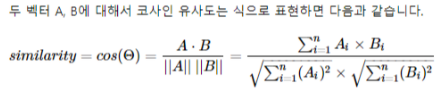
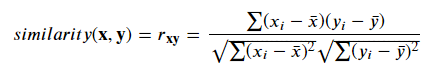

In [136]:
# 두 벡터간 피어슨 상관계수를 구해주는 get_pearson_correlation 함수를 구현해주세요.
# 두 벡터 u, v 중에 한 개라도 값이 비어 있다면 그에 대응하는 값들은 유사도를 구할 때 제외해주세요.
# 분모가 0이 되는 경우를 제외하기 위해 최종적으로 분모에 epsilon을 더해주세요.

def get_pearson_correlation(u, v, epsilon):
    mask = np.isfinite(u) & np.isfinite(v)
    u, v = u[mask] , v[mask]
    bar_u, bar_v = u.mean(), v.mean()
    
    uv = sum((u-bar_u)*(v-bar_v))
    norm1 = sum(((u - bar_u)**2))
    norm2 = sum((v - bar_v)**2)
    denom = np.sqrt(norm1)*np.sqrt(norm2)+epsilon
    score = uv/denom
    return score

    # Write your code here!
u = np.array([np.nan, 4, 3])
v = np.array([3, 2, 4])

get_pearson_correlation(u, v, epsilon = 0.0001)

-0.9999000099989999

**get_pearson_correlation**

구현한 `get_pearson_correlation()`를 테스트합니다.

결과는 `-0.9999000099990001`가 나와야 합니다.

In [137]:
# 테스트
u = np.array([np.nan, 4, 3])
v = np.array([3, 2, 4])

get_pearson_correlation(u, v, epsilon = 0.0001)

-0.9999000099989999

**get_pearson_correlation_table**

In [138]:
list(product(ratings))

[('노인과바다',), ('백설공주',), ('신데렐라',), ('어린왕자',), ('콩쥐팥쥐',), ('흥부전',)]

In [139]:
combinations = list(product(ratings.index))
combinations

[('민수',), ('민지',), ('지민',), ('지연',), ('현우',)]

In [140]:
index_combinations = list(product(ratings.index, repeat=2))
index_combinations

[('민수', '민수'),
 ('민수', '민지'),
 ('민수', '지민'),
 ('민수', '지연'),
 ('민수', '현우'),
 ('민지', '민수'),
 ('민지', '민지'),
 ('민지', '지민'),
 ('민지', '지연'),
 ('민지', '현우'),
 ('지민', '민수'),
 ('지민', '민지'),
 ('지민', '지민'),
 ('지민', '지연'),
 ('지민', '현우'),
 ('지연', '민수'),
 ('지연', '민지'),
 ('지연', '지민'),
 ('지연', '지연'),
 ('지연', '현우'),
 ('현우', '민수'),
 ('현우', '민지'),
 ('현우', '지민'),
 ('현우', '지연'),
 ('현우', '현우')]

In [141]:
similarity_list = []

for uname, vname in index_combinations:
    u, v = ratings.loc[uname],ratings.loc[vname]
    score = get_pearson_correlation(u, v, epsilon = 0.0001)
    similarity = { # json형식으로 row를 만들어 append할 준비를 한다.
        'u' : uname,
        'v' : vname,
        'score' : score
    }
    similarity_list.append(similarity)# 리스트에 추가한다.

In [142]:
similarity_list

[{'u': '민수', 'v': '민수', 'score': 0.9999166736105326},
 {'u': '민수', 'v': '민지', 'score': 0.9706849604587979},
 {'u': '민수', 'v': '지민', 'score': -0.948653298999167},
 {'u': '민수', 'v': '지연', 'score': -0.9044794915677618},
 {'u': '민수', 'v': '현우', 'score': -0.8659504102790666},
 {'u': '민지', 'v': '민수', 'score': 0.9706849604587979},
 {'u': '민지', 'v': '민지', 'score': 0.9999885715591822},
 {'u': '민지', 'v': '지민', 'score': -0.9999875001562478},
 {'u': '민지', 'v': '지연', 'score': -0.9448576141315388},
 {'u': '민지', 'v': '현우', 'score': 0.0},
 {'u': '지민', 'v': '민수', 'score': -0.948653298999167},
 {'u': '지민', 'v': '민지', 'score': -0.9999875001562478},
 {'u': '지민', 'v': '지민', 'score': 0.9999900000999988},
 {'u': '지민', 'v': '지연', 'score': 0.6741816811353741},
 {'u': '지민', 'v': '현우', 'score': 0.9999500024998746},
 {'u': '지연', 'v': '민수', 'score': -0.9044794915677618},
 {'u': '지연', 'v': '민지', 'score': -0.9448576141315388},
 {'u': '지연', 'v': '지민', 'score': 0.6741816811353741},
 {'u': '지연', 'v': '지연', 'score': 0.9

In [143]:
similarity_list = pd.DataFrame(similarity_list)
similarity_list

,u,v,score
0,민수,민수,0.999917
1,민수,민지,0.970685
2,민수,지민,-0.948653
3,민수,지연,-0.904479
4,민수,현우,-0.865950
5,민지,민수,0.970685
6,민지,민지,0.999989
7,민지,지민,-0.999988
8,민지,지연,-0.944858
9,민지,현우,0.000000


In [144]:
similarity_table = pd.pivot_table(values='score', index='u', columns='v', data=similarity_list)
similarity_table

v,민수,민지,지민,지연,현우
u,,,,,
민수,0.999917,0.970685,-0.948653,-0.904479,-0.865950
민지,0.970685,0.999989,-0.999988,-0.944858,0.000000
지민,-0.948653,-0.999988,0.999990,0.674182,0.999950
지연,-0.904479,-0.944858,0.674182,0.999969,0.816463
현우,-0.865950,0.000000,0.999950,0.816463,0.999950


In [146]:
# 모든 조합의 수를 구해주는 itertools의 product를 불러옵니다. 
from itertools import product

In [147]:
# 모든 사용자간의 피어슨 상관계수를 구해주는 get_pearson_correlation_table를 구현해주세요.
# 분모가 0이 되는 경우를 제외하기 위해 최종적으로 분모에 epsilon을 더해주세요. epsilon은 0.0001으로 설정하겠습니다. 
def get_pearson_correlation_table(ratings):
    
    index_combinations = list(product(ratings.index, repeat=2))
    similarity_list = []
    
    for uname, vname in index_combinations:
        
        u, v = ratings.loc[uname],ratings.loc[vname]
        score = get_pearson_correlation(u, v, epsilon = 0.0001)
        similarity = { # json형식으로 row를 만들어 append할 준비를 한다.
            'u' : uname,
            'v' : vname,
            'score' : score
        }
        similarity_list.append(similarity)# 리스트에 추가한다.
    return pd.pivot_table(values='score', index='u', columns='v', data=pd.DataFrame(similarity_list))

구현한 `get_pearson_correlation()`를 테스트합니다. 결과는 다음과 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>v</th>
      <th>민수</th>
      <th>민지</th>
      <th>지민</th>
      <th>지연</th>
      <th>현우</th>
    </tr>
    <tr>
      <th>u</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>민수</th>
      <td>0.999917</td>
      <td>0.970685</td>
      <td>-0.948653</td>
      <td>-0.904479</td>
      <td>-0.865950</td>
    </tr>
    <tr>
      <th>민지</th>
      <td>0.970685</td>
      <td>0.999989</td>
      <td>-0.999988</td>
      <td>-0.944858</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>지민</th>
      <td>-0.948653</td>
      <td>-0.999988</td>
      <td>0.999990</td>
      <td>0.674182</td>
      <td>0.999950</td>
    </tr>
    <tr>
      <th>지연</th>
      <td>-0.904479</td>
      <td>-0.944858</td>
      <td>0.674182</td>
      <td>0.999969</td>
      <td>0.816463</td>
    </tr>
    <tr>
      <th>현우</th>
      <td>-0.865950</td>
      <td>0.000000</td>
      <td>0.999950</td>
      <td>0.816463</td>
      <td>0.999950</td>
    </tr>
  </tbody>
</table>

In [149]:
# 테스트
get_pearson_correlation_table(ratings)

v,민수,민지,지민,지연,현우
u,,,,,
민수,0.999917,0.970685,-0.948653,-0.904479,-0.865950
민지,0.970685,0.999989,-0.999988,-0.944858,0.000000
지민,-0.948653,-0.999988,0.999990,0.674182,0.999950
지연,-0.904479,-0.944858,0.674182,0.999969,0.816463
현우,-0.865950,0.000000,0.999950,0.816463,0.999950


----

## Predict Ratings


### Get Nearest Neighbors

우선 특정 사용자 𝑢의 상품 𝑖를 평가할 때 사용자 𝑢의 이웃을 구하겠습니다. 기본적으로 사용자 𝑢와 유사도가 가장 큰 k명이 이웃이 됩니다. 하지만 조건을 좀 더 추가해야합니다. 가령 아이템에 평가를 내리지 않거나 유사도가 절대적으로 작은 사용자는 이웃이 될 수 없습니다.

다음의 조건에 해당하는 이웃을 구해주세요.

- 이웃의 기준은 유사도가 된다.
- 자기 자신은 이웃에서 제외한다.
- 해당 아이템에 평가를 내린 사람들중에서 최근접 이웃을 고른다. 즉, 아이템에 평가를 내린적 없는 사람들은 고려하지 않는다.
- 유사도가 0 이상인 사람들중에서 최근접 이웃을 고른다. 
- 유사도가 0 이상인 이웃이 없다면 그나마 가장 유사도가 가장 큰 한 명을 고른다.

결과적으로 아이템을 산 사람들중에서만 이웃이 지정되기 때문에 **예측하려는 아이템마다 구해지는 이웃이 달라질 수 있습니다.**

**get_nearest_neighbors**

In [150]:
def get_nearest_neighbors(user_name, item_name, ratings, similarity, k):
    
    neighbors_name = ratings[item_name].drop(index=user_name)
    neighbors_similarity = similarity[user_name].drop(index=user_name)
    
    # 해당 아이템의 평점이 NaN값을 가진 사람들 제외
    nan_user_name = neighbors_name[neighbors_name.isna()].index
    neighbors_name.drop(nan_user_name, inplace= True)
    neighbors_similarity.drop(nan_user_name, inplace= True)

    # 이웃들의 평점이 다 NaN이라면 빈 리스트 반환
    if len(neighbors_name) == 0: 
        return list() 
    
    best_neighbors = []
    sorted_neighbors_similarity = neighbors_similarity.sort_values(ascending=False)
    
    for idx,i in enumerate(sorted_neighbors_similarity):
        if i > 0:
            best_neighbors.append(sorted_neighbors_similarity.index[idx])
        else:
            if not best_neighbors:
                best_neighbors.append(sorted_neighbors_similarity.index[idx])
                return best_neighbors    
            return best_neighbors

In [151]:
# 테스트 1
pearson_correlation = get_pearson_correlation_table(ratings)

get_nearest_neighbors('민수', '노인과바다', ratings, pearson_correlation, k=2)

['현우']

In [152]:
# 테스트 2
pearson_correlation = get_pearson_correlation_table(ratings)

get_nearest_neighbors('민지', '백설공주', ratings, pearson_correlation, k=2)

['민수']

In [ ]:
# 특정 사용자 user_name의 상품 item_name를 예측할 때 user_name의 k명의 이웃들을 구하는 get_nearest_neighbors을 구현해주세요.
# 결과는 이웃들의 목록이 되어야합니다. 결과를 리스트(List)로 반환해주세요!
# 평점이 존재하는 이웃이 없다면 빈 리스트를 반환해주세요.
def get_nearest_neighbors(user_name, item_name, ratings, similarity, k):

    # Write your code here!

구현한 `get_nearest_neighbors()`를 테스트합니다. 결과는 다음과 같습니다.


**테스트 1**

`Index(['현우'], dtype='object', name='u')` 또는 `['현우']`

**테스트 2**

`Index(['민수'], dtype='object', name='u')` 또는 `['민수']`

In [ ]:
# 테스트 1
pearson_correlation = get_pearson_correlation_table(ratings)

get_nearest_neighbors('민수', '노인과바다', ratings, pearson_correlation, k=2)

In [ ]:
# 테스트 2
pearson_correlation = get_pearson_correlation_table(ratings)

get_nearest_neighbors('민지', '백설공주', ratings, pearson_correlation, k=2)

----

### Average Correction

유사한 상품/사용자에 더 큰 가중치를 주어 특정 상품에 대한 사용자의 ratings 값을 예측합니다. 유사도에 따라 ratings에 유사도가 높은 k개의 상품에 내려진 ratings의 평균/유사도가 높은 k명의 사용자가 내린 ratings의 평균을 제외한 값의 가중 평균을 구합니다. 이 값에 상품에 내린 ratings 값/사용자가 내린 ratings 값의 평균을 최종적으로 더하여 예측합니다. 상품/사용자가 받거나 하는 ratings 특성을 더 잘 반영합니다.


#### 사용자 기반(사용자-based) 기법
1. 특정 유사도 메트릭에 따라 사용자 $u$와 유사한 k명(혹은 이하)의 사용자를 결정합니다.
2. 유사한 k명의 사용자가 상품 $i$에 내린 ratings에 각각 k명의 사용자가 내린 ratings의 평균을 뺀 값에 대해 유사도에 따른 가중 평균을 구합니다.
3. 사용자 $u$이 내린 ratings 값의 평균을 더하여 값을 보정해줍니다.

$$
\hat r_{ui} = \bar r_u + \frac{\sum_{v \in {N_i}^k(u)}{similarity(u,v)} \cdot (r_{vi}-\bar r_v)}{\sum_{v \in {N_i}^k(u)}{similarity(u,v)}}
$$


#### 상품 기반(상품-based) 기법
1. 특정 유사도 메트릭에 따라 상품 $i$와 유사한 k개(혹은 이하)의 상품을 결정합니다.
2. 유사한 k개의 상품에 내린 사용자 $u$의 ratings에 각각 k개의 상품에 내려진 ratings의 평균을 뺀 값에 대해 유사도에 따른 가중 평균을 구합니다.
3. 상품 $i$에 내려진 ratings 값의 평균을 더하여 값을 보정해줍니다.

$$
\hat r_{ui} = \bar r_i + \frac{\sum_{j \in {N_u}^k(i)}{similarity(i,j)} \cdot (r_{uj}-\bar r_j)}{\sum_{j \in {N_u}^k(i)}{similarity(i,j)}}
$$

**average_correction_predict_rating**

In [153]:
def average_correction_predict_rating(user_name, item_name, ratings, similarity, k, epsilon):
    nearest_neighbors = get_nearest_neighbors(user_name, item_name, ratings, similarity, k)

    # 가까운 이웃이 없다면(특정 아이템에 평점이 한 개도 없다면)
    if len(nearest_neighbors) == 0:
        return np.nan
    else:
        
        neighbors_data = ratings[item_name][nearest_neighbors]
        neighbors_similarity = similarity[user_name][nearest_neighbors]

        nominator = ((neighbors_data - neighbors_data.mean()) * neighbors_similarity).sum()  # 분자
        denominator = neighbors_similarity.sum() # 분모
        score = neighbors_data.mean() + nominator / (denominator + epsilon)

        return score

In [154]:
# 테스트
pearson_correlation = get_pearson_correlation_table(ratings)

average_correction_predict_rating('민지', '노인과바다', ratings, pearson_correlation, k=1, epsilon=0.0001)

3.0

In [ ]:
# 특정 사용자 u의 상품 v의 평점을 예측한 겨결과를 반환하는 average_correction_predict_rating를 구현해주세요.
def average_correction_predict_rating(user_name, item_name, ratings, similarity, k, epsilon):
    nearest_neighbors = get_nearest_neighbors(user_name, item_name, ratings, similarity, k)
    
    # 가까운 이웃이 없다면(특정 아이템에 평점이 한 개도 없다면)
    if len(nearest_neighbors) == 0:
        return np.nan
    
    # Write your code here!

구현한 `average_correction_predict_rating`를 테스트합니다.

결과는 `3.6`이 됩니다.

In [ ]:
# 테스트
pearson_correlation = get_pearson_correlation_table(ratings)

average_correction_predict_rating('민지', '노인과바다', ratings, pearson_correlation, k=1, epsilon=0.0001)

**average_correction_predict**

In [ ]:
# 모든 비어있는 값을 예측하는 average_correction_predict 구현해주세요.
# 단 비어있는 값만 예측 결과를 반환해주세요.
# 사용자 기반, 상품 기반 기법 모두 가능하도록 구현합니다. 상품기반은 단순히 ratings를 transpose하고 진행하면 됩니다.
# k에 사용자 기반인지 상품기반인지 여부를 지정합니다.
# itertool의 predict와 위에서 구현한 average_correction_predict_rating를 활용하면 됩니다.
# kind는 유저 기반, k는 2, epsilon은 0.0001을 기본값으로 설정합니다.
def average_correction_predict(ratings, kind='user', k=2, epsilon=0.0001):
    # 상품 기반 예측이면 행렬을 뒤집어주고(transpose) 마지막에 결과를 다시 뒤집어서 반환합니다.
    if kind == 'item':
        ratings = ratings.T
    
    
    
    # Write your code here!
    
    
    
    # 아이템 기반이면 다시 뒤집어준다.
    if kind == 'item':
        return prediction.T

    return result

구현한 `average_correction_predict()`를 테스트합니다. 결과는 다음과 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>v</th>
      <th>노인과바다</th>
      <th>백설공주</th>
      <th>신데렐라</th>
      <th>어린왕자</th>
      <th>콩쥐팥쥐</th>
      <th>흥부전</th>
    </tr>
    <tr>
      <th>u</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>민수</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>3.6</td>
    </tr>
    <tr>
      <th>민지</th>
      <td>3.25</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>3.25</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>지민</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>2.902711</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>지연</th>
      <td>NaN</td>
      <td>3.6</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>현우</th>
      <td>NaN</td>
      <td>2.0</td>
      <td>NaN</td>
      <td>2.050505</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

In [ ]:
# 테스트
average_correction_predict(ratings, kind='user', k=2, epsilon=0.0001)

----